In [1]:
import pandas as pd
import numpy as np

In [2]:
ed1 = pd.read_excel('tabn146.xls')
ed1.dropna(thresh= len(ed1.columns)/2, axis= 0, inplace= True)
ed1.iloc[0] = ed1.iloc[0].fillna(axis= 0, method= 'ffill')

col1 = ed1.columns[0]
ed1.rename(columns = {col1:'State'}, inplace= True)
# ed1.iloc[1,0] = ''

ed1.set_index('State', drop= True, inplace= True)

ed1.iloc[0] = ed1.iloc[0]+ ' ' + ed1.iloc[1].map(lambda x : x.replace('-', '').replace('\n', '').replace('\\2\\', ''), na_action = 'ignore')
ed1.columns = ed1.iloc[0]
ed1 = ed1.iloc[3:]
ed1

ed1.index = ed1.index.map(lambda x : x.strip('.').replace('\\3\\', '').strip())
ed1.to_csv('ed_clean.csv')

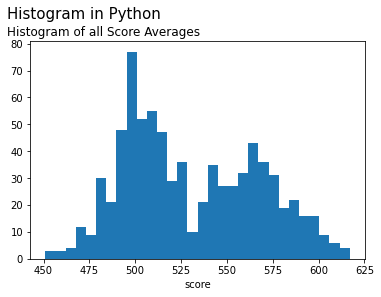

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


plt.hist(ed1.iloc[:, :-2].values.flatten(), bins= 30)
plt.suptitle('Histogram in Python', x=0.25, y= 1, size= 15)
plt.title('Histogram of all Score Averages', x= .22)
plt.xlabel('score');

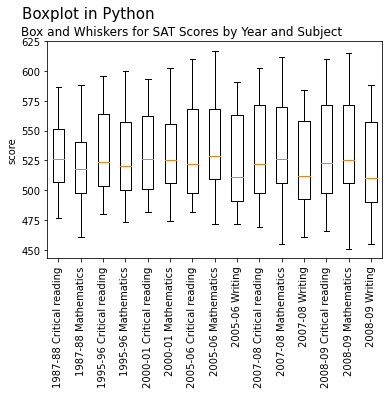

In [4]:
plt.boxplot(ed1.iloc[:, :-2], labels= ed1.columns[:-2])
plt.xticks(rotation= 90)
plt.ylabel('score')
plt.suptitle('Boxplot in Python', x = 0.22, size= 15, y= 1)
plt.title('Box and Whiskers for SAT Scores by Year and Subject', x= 0.4);

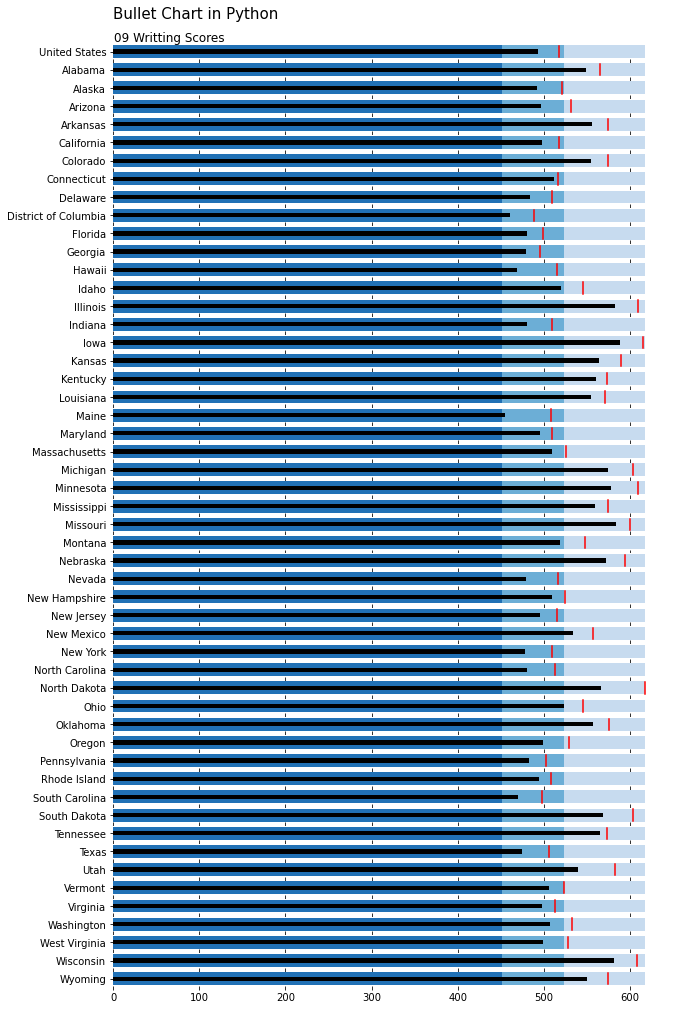

In [5]:
fig, axarr = plt.subplots(ed1.shape[0], figsize= (10, ed1.shape[0]/3), sharex= True)
averages = ed1.iloc[:, :-3].values.flatten()
limits = [averages.min(), np.median(averages), averages.max()]
palette = sns.color_palette("Blues_r", len(limits))

for r in range(ed1.shape[0]):
    ax = axarr[r]
    ax.set_aspect('equal')
    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim
    last_state = ed1.iloc[r, -3]
    ax.barh([1], last_state, color='black', height=5)
    ax.axvline(ed1.iloc[r].max(), color= 'red', ymax= .9, ymin= .1)
    ax.set_yticks([1])
    ax.set_yticklabels([ed1.index[r]])
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.suptitle("Bullet Chart in Python", size= 15, y= .91, x=.24)
plt.title("09 Writting Scores", y =66,x=.1);



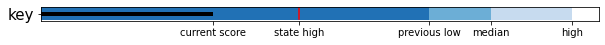

In [6]:
fig, ax = plt.subplots(figsize= (10, 1))

ax.set_aspect('equal')
prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim

ax.barh([1], 200, color='black', height=5)
ax.axvline(300, color= 'red', ymax= .9, ymin= .1)
ax.set_yticks([1])
ax.set_yticklabels(['key'], size= 15)
ax.set_xticks([limits[0], limits[1], limits[2], 200, 300])
ax.set_xticklabels(['previous low', 'median', 'high', 'current score', 'state high']);

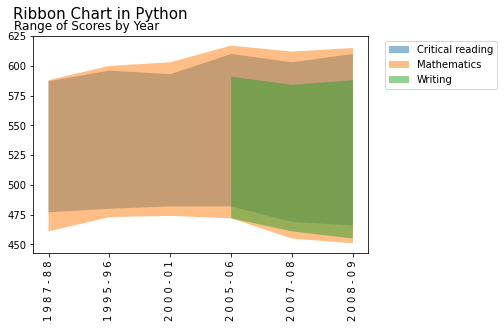

In [20]:
x = []
for col in ed1.columns[:-2]:
    x.append(' '.join(col.split()[0]))
ed2 = ed1.iloc[:,0]
y = []
for col in ed1.columns[:-2]:
    y.append(' '.join(col.split()[1:]))
ed2 = ed1.iloc[:,:-2]
z = pd.MultiIndex.from_arrays([x,y], names= ('year', 'topic'))
ed2.columns = z
cmin = ed2.min()
cmax = ed2.max()
ed3 = pd.DataFrame(cmin).reset_index().join(pd.DataFrame(cmax).reset_index()[0], rsuffix= 'max')

for t in ed3['topic'].unique():
    year = ed3[ed3['topic'] == t]['year'].values
    year = year.tolist()
    ymin = ed3[ed3['topic'] == t]['0']
    ymin = ymin.astype('int64')
    ymax = ed3[ed3['topic'] == t]['0max']
    ymax = ymax.astype('int64')
    plt.fill_between(year, ymin, ymax, alpha= .5, label= t)
plt.suptitle('Ribbon Chart in Python', size= 15, x=.28)
plt.title('Range of Scores by Year', x= .16)
plt.xticks(rotation= 90)
plt.legend(bbox_to_anchor= (1.4,1));

In [ ]:
ed2.droplevel(level =1, axis=1)
